In [1]:
import sys
sys.path.append('/Users/lindsaybassman/Documents/LBL/ArQTiC')
from arqtic.simulation_generator import Simulation_Generator
import matplotlib.pyplot as plt
import numpy as np
import qiskit as qk
from qiskit import Aer, IBMQ, execute
import random
import qsearch
import scipy.linalg as la

In [2]:
#create simulation object
sim_obj = Simulation_Generator("QITE_input.txt")
N = sim_obj.num_spins

In [3]:
#connect to IBM
#if this is your first run enter your API key
#sim_obj.connect_IBM(api_key="your_key_here")

In [4]:
#generate circuits
sim_obj.generate_programs()

Creating IBM quantum circuit objects...
IBM quantum circuit objects created


In [5]:
#get results
energies = sim_obj.qite_energies

In [6]:
#compute true ground state energy analytically
#Pauli matrices
sx = np.array([[0, 1], [1, 0]])
sy = np.array([[0, -1j], [1j, 0]])
sz = np.array([[1, 0], [0, -1]])
Jz = sim_obj.Jz
mu_x = sim_obj.h_ext
hinit = np.zeros((2**N, 2**N), dtype=np.complex128)
#below is hardcoded for a 3-qubit TFIM
#3qubits TFIM
hinit += Jz*np.kron(np.eye(2),np.kron(sz,sz))
hinit += Jz*np.kron(np.kron(sz,sz),np.eye(2))
hinit += mu_x*np.kron(sx,np.kron(np.eye(2),np.eye(2)))
hinit += mu_x*np.kron(np.eye(2),np.kron(sx,np.eye(2)))
hinit += mu_x*np.kron(np.eye(2),np.kron(np.eye(2),sx))

eigvals_i, eigvecs_i = la.eig(hinit)
gs_eng = np.real(min(eigvals_i))
print(gs_eng)

-3.493959207434934


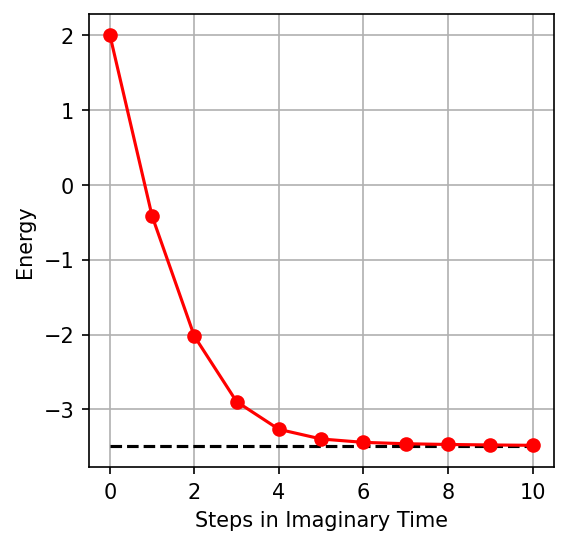

In [7]:
plt.figure(figsize=[4,4], dpi=150)
#plt.plot(np.arange(0,num_beta+1)*dbeta,E,'-ro',label='QITE')
plt.plot(energies,'-ro')
#plt.axhline(y=w[0], color='k',linestyle='--',label="Ground state")
#plt.title("QITE")
plt.xlabel("Steps in Imaginary Time")
plt.ylabel("Energy")
#ground state enegy for Jz=mu_x=1
timesteps = sim_obj.beta/sim_obj.delta_beta
plt.hlines(gs_eng, 0, timesteps, color="black", linestyles='dashed') #3qubits Jz=1, mu_x=1
plt.grid()
plt.show()
#plt.savefig('QITE_GSenergy.png')